## FEATURE SELECTION USING FILTER METHODS

### What is Feature Selection?

Feature selection, also known as variable/predictor selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features for use in machine learning model construction.

Machine learning works on a simple rule – if you put garbage in, you will only get garbage to come out. By garbage here, I mean noise in data.

This becomes even more important when the number of features is very large. You need not use every feature at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important. “Sometimes, less is better!”

You not only reduce the training time and the evaluation time, but you also have fewer things to worry about!

### Feature engineering vs Feature selection:

Feature engineering enables you to build more complex models than you could with only raw data. It also allows you to build interpretable models from any amount of data. Feature selection will help you limit these features to a manageable number.

### Feature selection vs Feature extraction:

Feature selection is for filtering irrelevant or redundant features from your dataset. The key difference between feature selection and extraction is that feature selection keeps a subset of the original features while feature extraction creates brand new ones.

### Importance of Feature Selection in Machine Learning

There are 2 things that distinguish data science winners from others in most cases: Feature Creation and Feature Selection.

In other words, it boils down to creating variables that capture hidden business insights and then making the right choices about which variable to choose for your predictive models 

### The top reasons to use feature selection are:

- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.
Next, we’ll discuss various methodologies and techniques that you can use to subset your feature space and help your models perform better and efficiently. 

### Filter Method for Feature selection

The filter method ranks each feature based on some uni-variate metric and then selects the highest-ranking features. 

### Filter Selection Select independent features with: 

- No constant Variables
- No/less Quadi-constant variables
- No Duplicate Rows
- High correlation with the target variable
- Low correlation with another independent variable
- Higher information gain or mutual information of the independent variable.

### Advantages of Filter methods


- Filter methods are model agnostic(compatible)
- Rely entirely on features in the data set
- Computationally very fast
- Based on different statistical methods


### The disadvantage of Filter methods

The filter method looks at individual features for identifying it’s relative importance. A feature may not be useful on its own but may be an important influencer when combined with other features. Filter methods may miss such features.

One thing that should be kept in mind is that the filter method does not remove multicollinearity. So, you must deal with the multicollinearity of features as well before training models for your data.


### Importing Dataset and Library

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"Standard Customer Data.csv", nrows=40000)    #Taking only 40K rows from the start
data.shape

(40000, 371)

It is important to mention here that, in order to avoid overfitting, feature selection should only be applied to the training set.

### Splitting Data Into Training and Test Sets

In [81]:
train_x, test_x, train_y, test_y= train_test_split(data.drop("TARGET",axis=1),data.TARGET,test_size=0.2,random_state=41)

#Here, X = data.drop("TARGET",axis=1), Y = data.Target

### Step:1 Removing Constant features

Constant features are the type of features that contain only one value for all the outputs in the dataset. Constant features provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset.

#### Removing Constant Features using VarianceThreshold

To remove constant features we will use VarianceThreshold function. The function requires a value for its threshold parameter. Passing a value of zero for the parameter will filter all the features with zero variance i.e constant features.

In [87]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)

#Fitand transforming on train data
data_constant = constant_filter.fit_transform(train_x)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in train_x.columns
                    if column not in train_x.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(32000, 320)
50
ind_var2_0
ind_var2
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var17_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


#### Removing above identified constant columns from our database:

In [91]:
data_cons = data.drop(constant_columns,axis=1)
data_cons.shape

(40000, 321)

Earlier the length was 371. Now is 320. To see the constant columns names:

### Step 2: Removing Quasi-Constant Features

Quasi-constant features, as the name suggests, are the features that are almost constant. Such features are not very useful for making predictions. There is no rule as to what should be the threshold for the variance of quasi-constant features. 

However, as a rule of thumb, remove those quasi-constant features that have more than 99% similar values for the output observations.

Thus, instead of passing 0 as the value for the threshold parameter, we will pass 0.01, which means that if the variance of the values in a column is less than 0.01, remove that column. In other words, remove feature column where approximately 99% of the values are similar.

In [89]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fitand transforming on train data
data_qcons = qcons_filter.fit_transform(train_x)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in train_x.columns
                    if column not in train_x.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(32000, 265)
105
ind_var1
ind_var2_0
ind_var2
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var41
ind_var39
ind_var44_0
ind_var44
ind_var46_0
ind_var46
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_op_var40_hace3
num_var27_0
num_var28_0
num_var28
num_var27
num_var29_0
num_var29
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_aport_var33_1y3
delta_num_aport_var33_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var33_hace3
i

We got 105 Quasi constant. Earlier we got 50 when variance was 0. This si surely a better result. The threshold ro be kept depends on us.

#### Removing above identified quasi constant columns from our database:

In [90]:
data_qcons = data.drop(qcons_columns,axis=1)
data_qcons.shape

(40000, 266)

the remaining shape of our data is , we have 266 columns left now!

### Step 3 Removing Duplicate Columns

Duplicate features are the features that have similar values. Duplicate features do not add any value to algorithm training, rather they add overhead and unnecessary delay to the training time. Therefore, it is always recommended to remove the duplicate features from the dataset before training.

For constant and quasi-constant features, we have no built-in Python method that can remove duplicate features. However, we have a method that can help us identify duplicate rows in a pandas dataframe. Using that by transposing

#### Transposing our "quasi-constant" modified dataset.

In [97]:
data_qcons_t = data_qcons.T
data_qcons_t.shape

(266, 40000)

Now, that our columns have taken the place of row, we can find the duplicacy in columns:

In [96]:
print(data_qcons_t.duplicated().sum())

21


Thus, even after removing quasi-constant columns, we have 21 more columns to be removed that are duplicated.

Finally, we can drop the duplicate rows using the drop_duplicates() method. If you pass the string value first to the keep parameter of the drop_duplicates() method, all the duplicate rows will be dropped except the first copy. We will then ranspose back our new data.

#### Dropping Duplicated method using drop_duplicates()

In [99]:
data_cons_dup = data_qcons_t.drop_duplicates(keep='first').T
data_cons_dup.shape

(40000, 245)

We got a better refined training set with 245 columns now.

### Step: 4 Correlation of Features with the Target Variable

In addition to the duplicate features, a dataset can also contain correlated features. Identify input features having a high correlation with the target variable.Here we print the correlation of each of the input feature with the target variable.

As this database has columns that has very low correlations, we will use some other database for calculation.

#### Importing and Processing Database

In [246]:
cardata = pd.read_csv("mpg.csv")
cardata.dropna()
cardata.shape
cardata.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [208]:
# cardata.info()

#### Handling categorical variable:

There are 3 categorical variables as can be said by seeing dtype of columns.

In [247]:
#Updating the horsepower feature to int
cardata["horsepower"]= pd.to_numeric(cardata["horsepower"])

We see that horsepower is no more a categorical variable and Car name is the only categorical variable.

In [248]:
# Label Encoding:
    
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= cardata.iloc[:, 8].values
X_en = labelencoder.fit_transform(X_en)

In [249]:
cardata = cardata.drop(["name","origin"],axis=1)
cardata["name"] = X_en

#### Creating the input features X and target variable y

In [250]:
y= cardata["mpg"]
X = cardata.iloc[:,1:8]
X.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,name
0,8,307.0,130.0,3504,12.0,70,49
1,8,350.0,165.0,3693,11.5,70,36


In [214]:
y.head(2)

0    18.0
1    15.0
Name: mpg, dtype: float64

In [251]:
#Create a data set copy with all the input features after converting them to numeric including target variable
full_data= X.copy()
full_data["mpg"]= y
print(full_data.head(2))

   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0    3504          12.0          70   
1          8         350.0       165.0    3693          11.5          70   

   name   mpg  
0    49  18.0  
1    36  15.0  


#### Finding correlation with target variable of independent predictors:

In [252]:
imp = full_data.drop("mpg", axis=1).apply(lambda x: x.corr(full_data.mpg))
print(imp)

cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
name            0.273936
dtype: float64


In [253]:
indices = np.argsort(imp)
print(indices)

cylinders       3
displacement    1
horsepower      2
weight          0
acceleration    6
model_year      4
name            5
dtype: int64


In [222]:
print(imp[indices])     #Sorted in ascending order

weight         -0.831741
displacement   -0.804203
horsepower     -0.778427
cylinders      -0.775396
name            0.273936
acceleration    0.420289
model_year      0.579267
dtype: float64


#### Plotting for Visualization

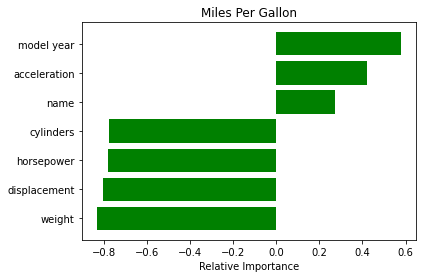

In [254]:
import matplotlib.pyplot as plt

names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'name']
plt.title('Miles Per Gallon')

#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Shown above is the correlation of each feature with our target variable(TARGET).We want to keep features with only a high correlation with the target variable. This implies that the input feature has a high influence in predicting the target variable.

We set the threshold to the absolute value of 0.4. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4

The correlation threshold value to determine highly collinear variables should be ± 0.50 or near that. Will take absolute value as both negative and positive correlation matters.

In [255]:
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight
acceleration
model year


That is car name can be dropped from our dataset as per our observations from predictors relationship with target.

In [261]:
X.drop("name",axis=1);

### Step 5: Correlation with Other Variables

Identify input features that have a low correlation with other independent variables.
Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features.
We will keep input features that are not highly correlated with other input features``

In [257]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
cylinders  is not correlated  with  name
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
displacement  is not correlated  with  name
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
horsepower  is not correlated  with  name
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower
weight  is not correlated  with  name
acceleration  is not correlated  with  model_year
acceleration  is not correlated  with  name
model_year  is not correlated  with  acceleration
model_year  is not correlated  with  name
name  is not correlated  with  cylinders
na

displacement, horsepower, cylinder, and weight are highly correlated. We will keep only keep one of them.Based on the above result we keep cylinders, acceleration and model year and remove horsepower, displacement, and weight


In [270]:
X= X.drop(["cylinders","weight","displacement"],axis=1);

In case of Dataset with large no. of input variable we can use pearson's or Spearman's coefficient to calculate correlational variables.

### Step:6 Finding Mutual Information or Information Gain

As per the wikipedia,In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" obtained about one random variable through observing the other random variable. 

As per Sklearn documentation, Mutual information (MI)between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

We will find the information gain or mutual information of the independent variable with respect to a target variable. 

In [282]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horsepower    392 non-null    float64
 1   acceleration  398 non-null    float64
 2   model_year    398 non-null    int64  
 3   name          398 non-null    int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 11.0 KB


(398, 4)

In [292]:
y.isnull()
y.shape

(398,)

In [294]:
# from sklearn.feature_selection import mutual_info_regression
# mi = mutual_info_regression(X, y);

Return : Estimated mutual information between each feature and the target.

In [297]:
# Plotting the mutual information

# mi = pd.Series(mi)
# mi.index = X.columns
# mi.sort_values(ascending=False)
# mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))


We now have our feature importance to predict the miles per gallon. Miles per gallon can be predicted based on the number of cylinders in the car, the year car was manufactured ad the acceleration. 

Filter method for feature selection is thus model agnostic, simple, and easy to interpret

References:
1. https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection
2. https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
3. https://towardsdatascience.com/feature-selection-in-python-using-filter-method-7ae5cbc4ee05
4. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html